Objectives:
1. Develop a Time series model
2. Fit time series datasets
3. Preprocess datasets
4. Visualize results
5. Smoothing time series data
6. Use the model for prediction
7. Report findings

 You need to find a suitable data source and import it to your project.

I

Part 2: How does it compare to the national unemployment rate?

Part 2:

7. Find/download and import the unemployment rate data for the nation as a whole.
8. The local data and the national data must match the number of months.
9. Plot the national data (report your findings)
10. Compare the two dataset in one plot. Report the resulting plot.
11. Run some smoothing techniques on the datasets and report the results.
12. Is there any need for smoothing the plots, any changes happened?
13. Predict the value of the unemployment rate for both local and national data in your birth month of year 2022.
14. Please submit the source code and .ipynp or .html file that includes the source code, answers of the questions and the resulting output of running the code.

## Explanation: I downloaded the dataset from following link: https://fred.stlouisfed.org/series/PORT941UR

# Please ensure that before downloading this dataset, you set the time range from January 2003 to January 2023, as this timeframe was used in this assignment is in this time ranges. 

### Data: Data represent the unemployment rate for the Portland-Hillsboro-Vancouver area (in Oregon and Washington State) for a 20 years period.
    

### importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calendar
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Import the datasets

In [2]:
# Import the dataset
unemp_rate = pd.read_csv('PORT941UR.csv')

### Cleaning dataset (missing values)

In [3]:
# finding missing values
missing_values = unemp_rate.isnull().sum()  # Count missing values in each column
print(missing_values)

DATE         0
PORT941UR    0
dtype: int64


### Result: We dont have any missing values in this dataset

### Rename columns

In [4]:
unemp_rate.columns = ['Date', 'Portlands Unemployment Rate']

### Use months as labels to plot the data. If the month names are too long, use abbreviations.

In [5]:
# Convert 'Date' column to datetime
unemp_rate['Date'] = pd.to_datetime(unemp_rate['Date'])

# seperate month and year
unemp_rate['Month'] = unemp_rate['Date'].dt.month
unemp_rate['Year'] = unemp_rate['Date'].dt.year
unemp_rate['Month'] = unemp_rate['Month'].apply(lambda x: calendar.month_abbr[x])  # Change month number to its name

# Finding and printing the highest unemployment rate with its corresponding year and month
highest_rate_row = unemp_rate.loc[unemp_rate['Portlands Unemployment Rate'].idxmax()]
highest_rate = highest_rate_row['Portlands Unemployment Rate']
highest_year = highest_rate_row['Year']
highest_month = highest_rate_row['Month']
print(f"\n\n\nHighest Portland's unemployment Rate was: {highest_rate}% in {highest_month} {highest_year}\n\n\n")




Highest Portland's unemployment Rate was: 13.3% in Apr 2020





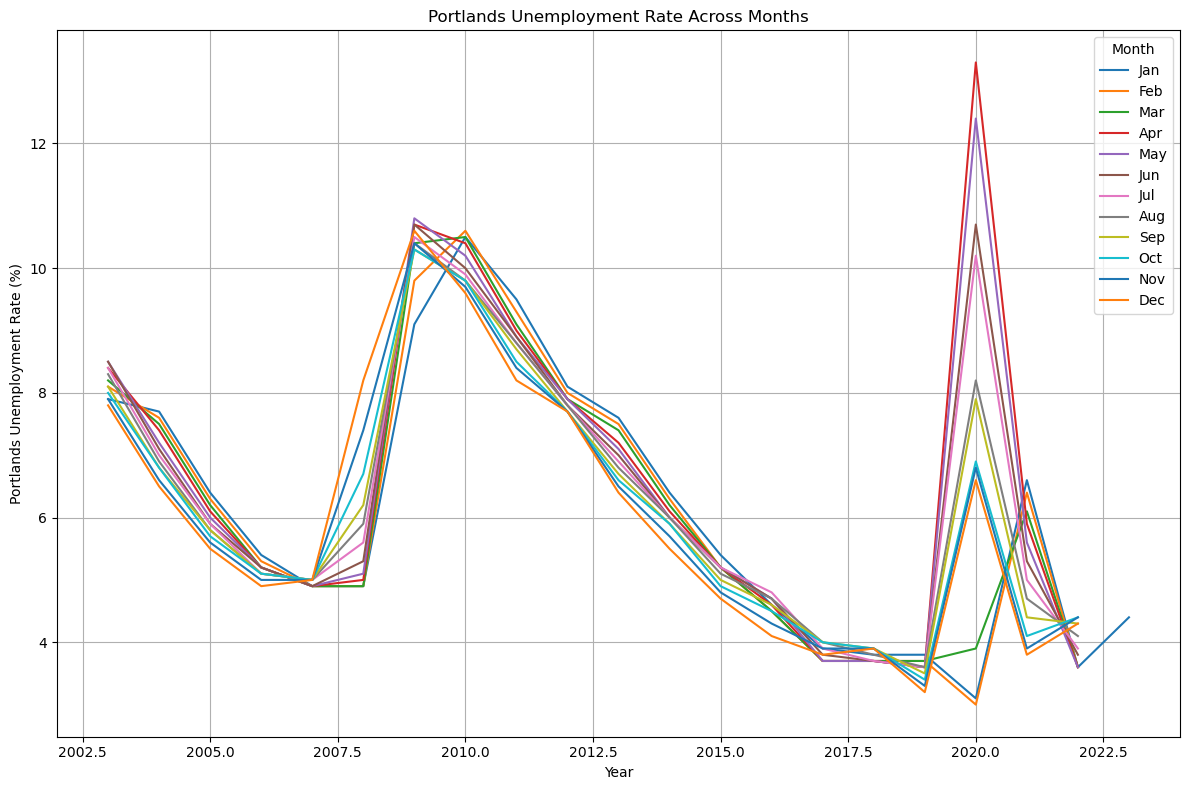

In [6]:
# Plot 1
plt.figure(figsize=(12, 8))  # Adjusted figure size for better visualization
months_order = calendar.month_abbr[1:]  # List of abbreviated month names in order

# Using a for loop
for month in months_order: 
    month_data = unemp_rate[unemp_rate['Month'] == month]
    sns.lineplot(x='Year', y='Portlands Unemployment Rate', data=month_data, label=month)

# Formatting the plot
plt.title('Portlands Unemployment Rate Across Months')
plt.xlabel('Year')
plt.ylabel('Portlands Unemployment Rate (%)')
plt.legend(title='Month')
plt.grid(True)
plt.tight_layout()
# Show plot
plt.show()

# Result of plot 1 : 
### How has Portland's unemployment rate changed over the last twenty years.
## The Portlands unemployment rate illustrates a fluctuating pattern over time. From 2003 to 2006, it steadily declined. However, between 2006 and 2010, there was a noticeable increase. A positive trend emerged from 2010 to 2019, just before the onset of the Covid-19 pandemic. Unfortunately, post-2019, the Portlands unemployment rate surged in 2020 but gradually declined as we progressed towards 2023.

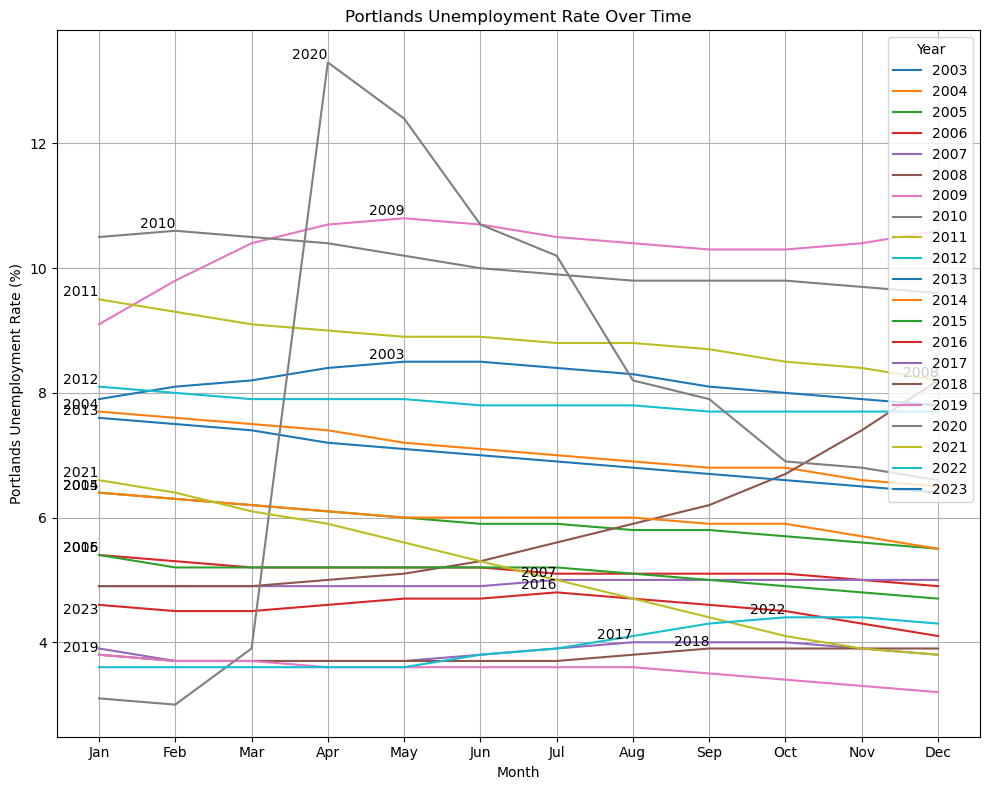

In [7]:
# Plot 2
plt.figure(figsize=(10, 8))
years = unemp_rate['Year'].unique()  # Based on years

# Using a for loop
for year in years: 
    year_data = unemp_rate[unemp_rate['Year'] == year]
    sns.lineplot(x='Month', y='Portlands Unemployment Rate', data=year_data, label=year)

# Indicating each line with their years
for year in years:
    year_data = unemp_rate[unemp_rate['Year'] == year]
    max_value = year_data['Portlands Unemployment Rate'].max()
    max_month = year_data.loc[year_data['Portlands Unemployment Rate'].idxmax()]['Month']
    plt.text(max_month, max_value, str(year), ha='right', va='bottom')

# Formatting the plot
plt.title('Portlands Unemployment Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Portlands Unemployment Rate (%)')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()



# Result of plot 2: 
### What was the highest Portland's unemployment rate over the last twenty years?
## In these two plots, the highest Portlands unemployment rate occurs in April 2020. This aligns with the time when governments worldwide began imposing quarantines due to the pandemic. Many jobs were either suspended, lost, or temporarily shut down, and many employers laid off. As a result of this crisis, the Portlands unemployment rate soared to its highest point in the past 20 years.